# Set KP yaw

In [1]:
%%capture

# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
#import windspectra
import os.path
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
HHplane_prefix='%s_%i_%i_%i_%s.dat'
basedir= '/gpfs/alpine/cfd162/scratch/lcheung/AWAKEN/UnstableABL1_precursor2/post_processing/extractpoints/'
HHdir  = basedir+'/timetrace_z90/KP'
TIdir  = basedir+'/timetrace_z60/KP'
turbinenames    = [line.strip() for line in open(basedir+'/KPturbnames.txt', 'r')]
turbinelist_ixy = np.loadtxt(basedir+'/KP_ixyz.dat')
turbinelist_xy  = np.loadtxt(basedir+'/KP_xyz.dat')
Nturbs          = len(turbinelist_ixy) #41
zhh             = 90.0
zti             = 60.0
tavg            = [16125, 16125+900]
yawfile         = 'KP_turbine_yaw.txt'

In [3]:
# Load all of the data
alldat90 = []
#alldat60 = []
for i, txy in enumerate(turbinelist_ixy[:Nturbs]):
    HHfilename = HHdir+'/'+HHplane_prefix%(turbinenames[i], int(txy[0]), int(txy[1]), int(txy[2]), 'z90')
    TIfilename = TIdir+'/'+HHplane_prefix%(turbinenames[i], int(txy[0]), int(txy[1]), int(txy[2]), 'z60')
    alldat90.append(np.loadtxt(HHfilename))
    #alldat60.append(np.loadtxt(TIfilename))

In [4]:
def filterdat(alldat, tavg):
    allfilterdat=[]
    for dat in alldat:
        if len(tavg)==0:
            tavg=[np.min(dat[:,0])-9999, np.max(dat[:,0])+999]
        filtert=((tavg[0]<=dat[:,0]) & (dat[:,0] <= tavg[1]))
        filterdat=dat[filtert,:]
        allfilterdat.append(filterdat)
    return allfilterdat

def getwinddir(u, v):
    return 270.0-np.arctan2(v, u)*180.0/np.pi

In [5]:
allfilterdat=filterdat(alldat90, tavg)
allturbmeans = [np.mean(x, axis=0) for x in allfilterdat]
allwinddirs  = [getwinddir(x[7], x[8]) for x in allturbmeans]

In [6]:
# Write the yaw file
with open(yawfile, 'w') as f:
    f.write("# Turbine yaw averaged "+repr(tavg)+'\n')
    for iturb, turb in enumerate(turbinenames):
        f.write("%s %f\n"%(turb, allwinddirs[iturb]))

Text(0, 0.5, 'UTM Northing [m]')

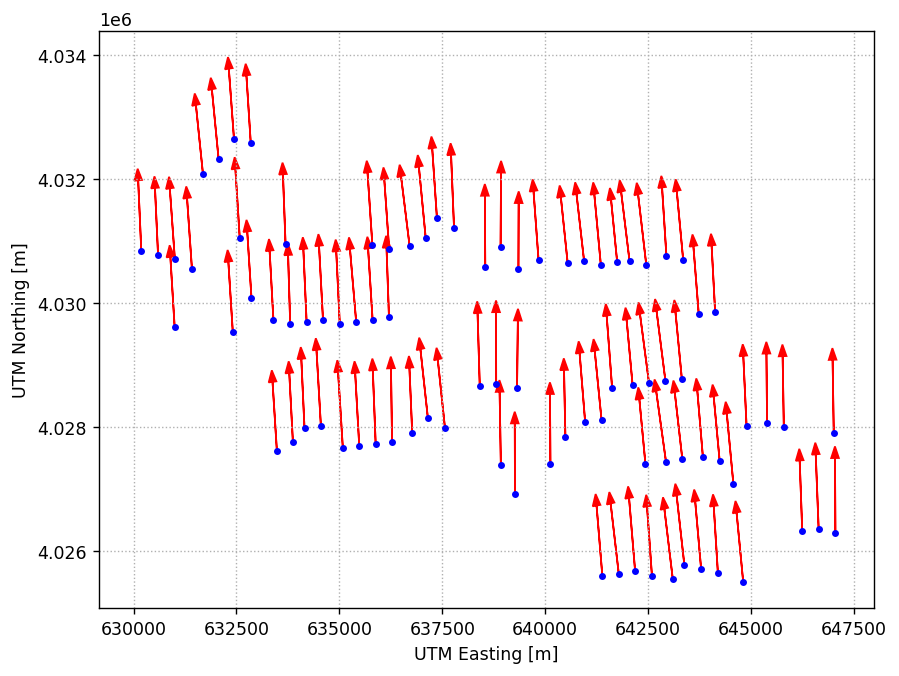

In [7]:
# Make a plot of the wind directions
fig=plt.figure(figsize=(8,6), dpi=125)
scale=125
for iturb, xy in enumerate(turbinelist_xy): 
    u = allturbmeans[iturb][7]
    v = allturbmeans[iturb][8]
    plt.plot(xy[0], xy[1], 'b.')
    plt.arrow(xy[0], xy[1], scale*u, scale*v, color='r', head_width=scale*1.5, head_length=scale*1.5)

plt.grid(ls=':')
plt.xlim([ 625000,  650000])
#plt.ylim([4015000, 4040000])
plt.axis('auto')
plt.xlabel('UTM Easting [m]')
plt.ylabel('UTM Northing [m]')